In [1]:
!pip install lightgbm xgboost tabulate optuna

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


In [3]:
train=pd.read_csv('./Train_data.csv')

In [4]:
test=pd.read_csv('./Test_data.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [8]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [10]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<AxesSubplot:xlabel='class', ylabel='count'>

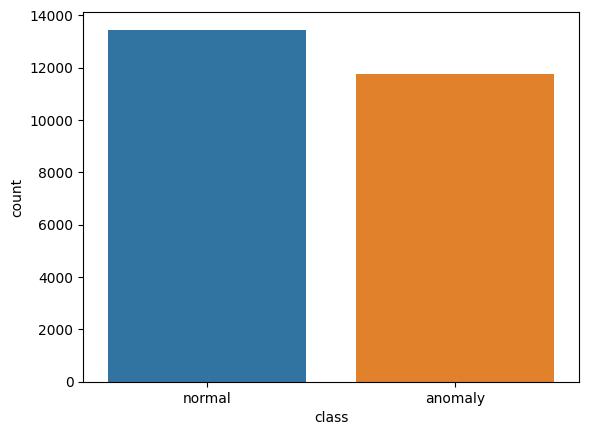

In [11]:
sns.countplot(x=train['class'])

In [12]:
print('Class Distribution Training Set:')
print(train['class'].value_counts())

Class Distribution Training Set:
normal     13449
anomaly    11743
Name: class, dtype: int64


In [13]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [14]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [15]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [16]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [17]:
X_train = X_train[selected_features]

In [18]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

# SVC

In [20]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [21]:
svc_y_pred = svc.predict(x_test)

In [22]:

accuracy_score(y_test,svc_y_pred)

0.9323895210373114

In [23]:
svc_train, svc_test = svc.score(x_train , y_train), svc.score(x_test , y_test)

print(f"Training Score: {svc_train}")
print(f"Test Score: {svc_test}")

Training Score: 0.9356357037541114
Test Score: 0.9323895210373114


In [24]:
f1_score = metrics.f1_score(y_test,svc_y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9322310075600991


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [26]:
clf_y_pred = clf.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test,clf_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9964276263561789


In [28]:
ran_train, ran_test = clf.score(x_train , y_train), clf.score(x_test , y_test)

print(f"Training Score: {ran_train}")
print(f"Test Score: {ran_test}")

Training Score: 1.0
Test Score: 0.9964276263561789


In [29]:
f1_score = metrics.f1_score(y_test,clf_y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9964275909508982


# Gradient Boost

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

grd = GradientBoostingClassifier()
grd.fit(x_train,y_train)

GradientBoostingClassifier()

In [31]:
y_pred = grd.predict(x_test)

In [32]:
print('Accuracy of Gradient Boost is: ', grd.score(x_test,y_test) * 100,'%')

Accuracy of Gradient Boost is:  99.27229425774014 %


In [33]:
grd_train, grd_test = grd.score(x_train , y_train), grd.score(x_test , y_test)

print(f"Training Score: {grd_train}")
print(f"Test Score: {grd_test}")

Training Score: 0.9947828059430646
Test Score: 0.9927229425774015


# Logistic Regression

In [34]:
import time

In [35]:
from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.057062387466430664


In [36]:
start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.002354860305786133


In [37]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [38]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9287739593966202
Test Score: 0.9231278115903678


In [39]:
print('Accuracy of logistic Regression is: ', lg_model.score(x_test,y_test) * 100,'%')

Accuracy of logistic Regression is:  92.31278115903679 %


In [40]:
!pip install optuna

In [41]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

c:\Users\abhis\anaconda3\envs\new_environment\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# KNN

In [42]:

def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [43]:

study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9797565493516803], datetime_start=datetime.datetime(2024, 6, 16, 16, 0, 8, 810403), datetime_complete=datetime.datetime(2024, 6, 16, 16, 0, 9, 535712), params={'KNN_n_neighbors': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [44]:

KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9807190654417602
Test Score: 0.9797565493516803


# Decesion Tree Classifier

In [45]:

from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.015631675720214844


In [46]:
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.0029904842376708984


In [47]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [48]:

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[0.9960306959513099], datetime_start=datetime.datetime(2024, 6, 16, 16, 0, 12, 268490), datetime_complete=datetime.datetime(2024, 6, 16, 16, 0, 12, 301934), params={'dt_max_depth': 15, 'dt_max_features': 8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=17, value=None)


In [49]:
#DTree
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")



Train Score: 0.9999432913689463
Test Score: 0.9945752844667901


# Plotting different Models and their accuracy

In [50]:
data = [["KNN", KNN_train, KNN_test],
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test],
        ["SVC", svc_train, svc_test ],
        ["Random Forest", ran_train, ran_test],
        ["Gradient", grd_train, grd_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.980719 │     0.979757 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.928774 │     0.923128 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      0.999943 │     0.994575 │
├─────────────────────┼───────────────┼──────────────┤
│ SVC                 │      0.935636 │     0.93239  │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      1        │     0.996428 │
├─────────────────────┼───────────────┼──────────────┤
│ Gradient            │      0.994783 │     0.992723 │
╘═════════════════════╧═══════════════╧══════════════╛


In [51]:

SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

lr = LogisticRegression()

svc = SVC()
grd=GradientBoostingClassifier()
ran=RandomForestClassifier(n_estimators=50)


In [52]:

models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc
models['SVC']=svc
models['GradientBostingClassifier']=grd
models['RandomForest']=ran

In [53]:
from sklearn.model_selection import cross_val_score

scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [54]:
def line(name):
  return '-'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

--------------- KNeighborsClassifier Model Validation ---------------
Mean precision: 
 98.45 % +- 0.48

Mean recall: 
 98.24 % +- 0.54

---------------- LogisticRegression Model Validation ----------------
Mean precision: 
 91.35 % +- 0.57

Mean recall: 
 95.72 % +- 0.67

-------------- DecisionTreeClassifier Model Validation --------------
Mean precision: 
 99.51 % +- 0.2

Mean recall: 
 99.55 % +- 0.2

------------------------ SVC Model Validation ------------------------
Mean precision: 
 95.74 % +- 0.59

Mean recall: 
 98.34 % +- 0.43

------------- GradientBostingClassifier Model Validation -------------
Mean precision: 
 99.14 % +- 0.31

Mean recall: 
 99.52 % +- 0.21

------------------- RandomForest Model Validation -------------------
Mean precision: 
 99.59 % +- 0.17

Mean recall: 
 99.82 % +- 0.13



<AxesSubplot:>

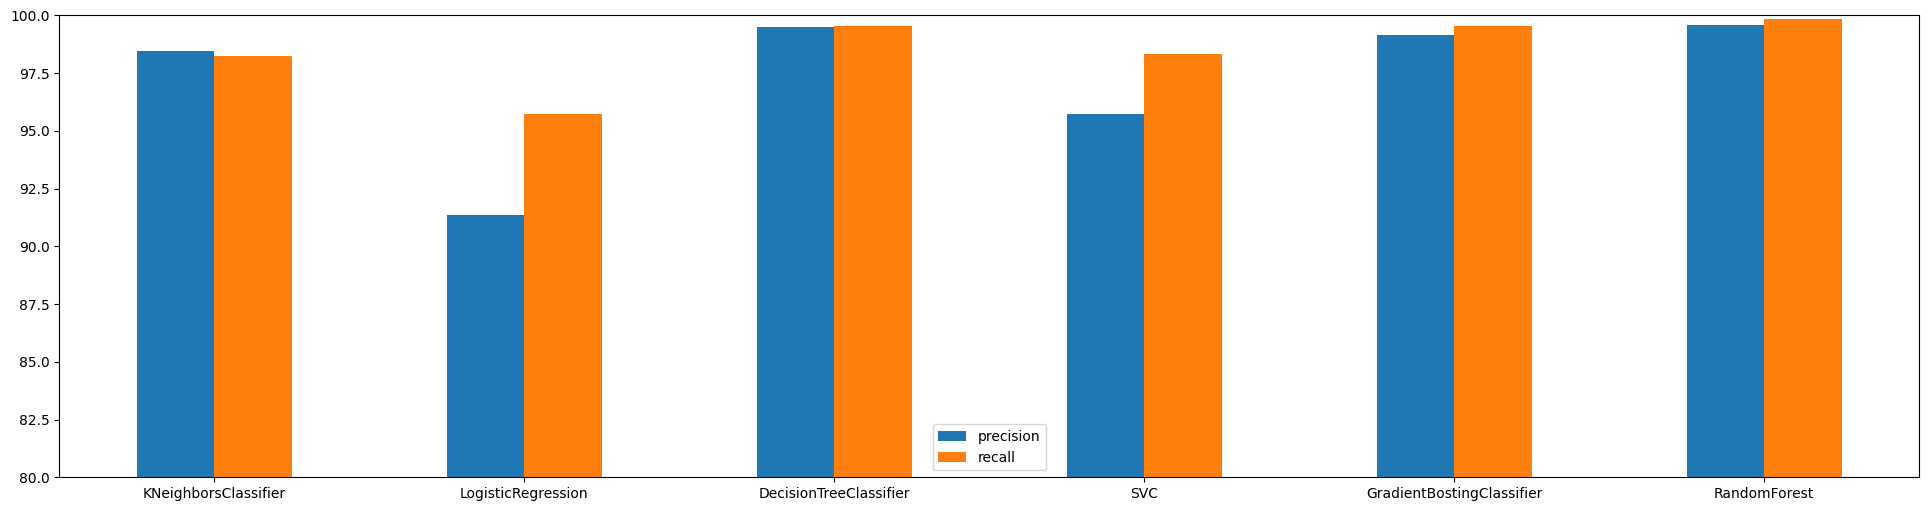

In [55]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [56]:
models = {}
models['KNN']= knn
models['LR']= lr
models['DC']= dtc
models['SVC']=svc
models['GRD']=grd
models['Rf']=ran

In [57]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def line(name,sym="-"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

------------------------ KNN Model Testing ------------------------
[[3435   63]
 [  65 3995]]
------------------------
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98      3498
     anamoly       0.98      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

------------------------ LR Model Testing ------------------------
[[3127  371]
 [ 210 3850]]
------------------------
              precision    recall  f1-score   support

      normal       0.94      0.89      0.91      3498
     anamoly       0.91      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558

------------------------ DC Model Testing ------------------------
[[3483   15]
 [  27 4033]]
-------------

<AxesSubplot:>

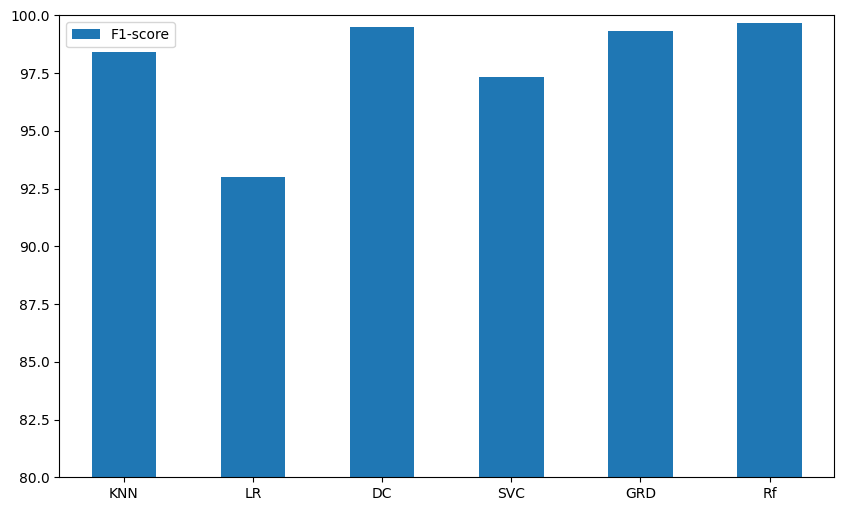

In [59]:

from sklearn.metrics import accuracy_score, f1_score

f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)



In [60]:
f1s['F1-score']

KNN    98.423257
LR     92.983939
DC     99.481993
SVC    97.323601
GRD    99.322243
Rf     99.655257
Name: F1-score, dtype: float64

# Deep learning Approach

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Load data

In [62]:

train = pd.read_csv('./Train_data.csv')
test = pd.read_csv('./Test_data.csv')


# Data preprocessing (assuming this is defined earlier in the notebook)

In [63]:

def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

X_train = train.drop(['class'], axis=1)
Y_train = train['class']


# Feature Selection using RFE

In [64]:

rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

selected_features = [v for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns) if i==True]
X_train = X_train[selected_features]


# Standardize features

In [65]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)


# Model

In [66]:

num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 3

# Compile and train the model 

In [68]:

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = model.fit(x_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
441/441 [==============================] - 3s 5ms/step - loss: 0.3480 - accuracy: 0.8552 - val_loss: 0.1515 - val_accuracy: 0.9495
Epoch 2/50
441/441 [==============================] - 2s 5ms/step - loss: 0.2065 - accuracy: 0.9312 - val_loss: 0.1334 - val_accuracy: 0.9563
Epoch 3/50
441/441 [==============================] - 2s 5ms/step - loss: 0.1737 - accuracy: 0.9415 - val_loss: 0.1193 - val_accuracy: 0.9643
Epoch 4/50
441/441 [==============================] - 2s 5ms/step - loss: 0.1710 - accuracy: 0.9445 - val_loss: 0.1120 - val_accuracy: 0.9612
Epoch 5/50
441/441 [==============================] - 2s 5ms/step - loss: 0.1589 - accuracy: 0.9489 - val_loss: 0.1115 - val_accuracy: 0.9643
Epoch 6/50
441/441 [==============================] - 2s 5ms/step - loss: 0.1535 - accuracy: 0.9489 - val_loss: 0.1033 - val_accuracy: 0.9671
Epoch 7/50
441/441 [==============================] - 2s 5ms/step - loss: 0.1451 - accuracy: 0.9529 - val_loss: 0.1002 - val_accuracy: 0.9702
Epoch 

In [69]:
# Evaluate the model
scores = model.evaluate(x_test, y_test_cat, verbose=0)
print("Deep Learning Model Accuracy: %.2f%%" % (scores[1] * 100))

# Predictions and classification report
y_pred_cat = model.predict(x_test)
y_pred = np.argmax(y_pred_cat, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Deep Learning Model Accuracy: 97.31%
237/237 [==============================] - 0s 1ms/step
Confusion Matrix:
[[3362  136]
 [  67 3993]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3498
           1       0.97      0.98      0.98      4060

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



# Plot training & validation accuracy values

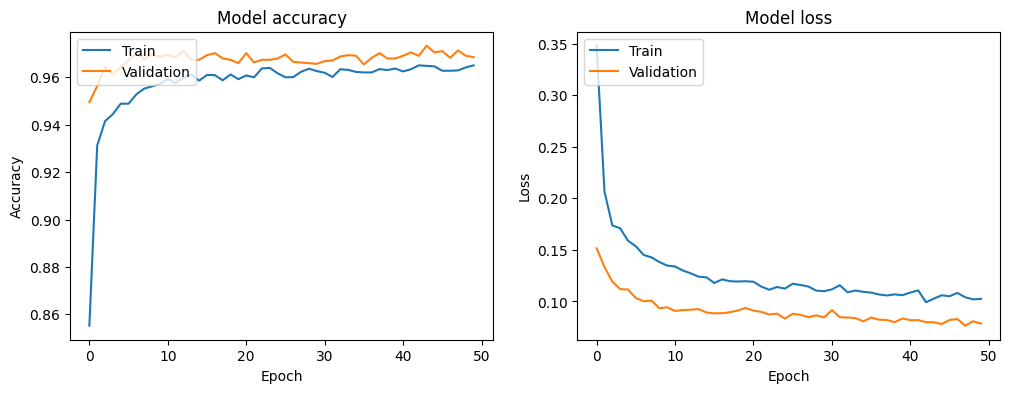

In [70]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


<AxesSubplot:>

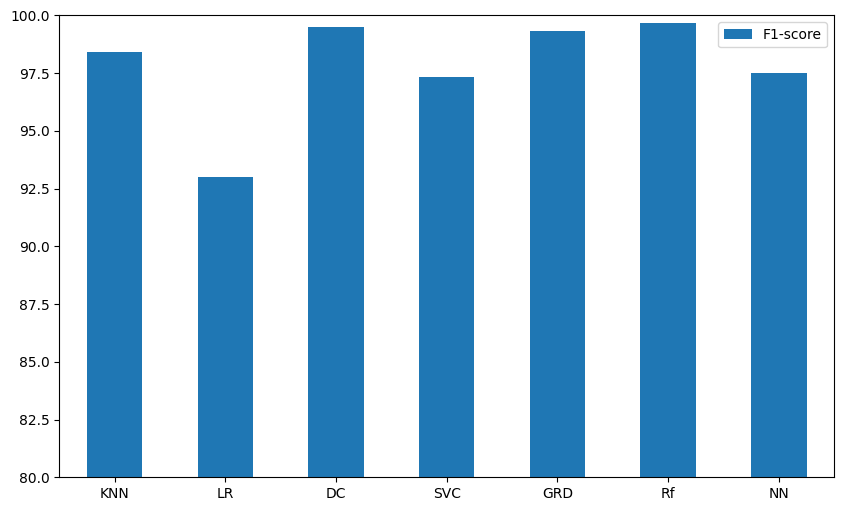

In [71]:

from sklearn.metrics import accuracy_score, f1_score

f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s['NN']=f1_score(y_test, y_pred)
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)



In [72]:
f1s['F1-score']

KNN    98.423257
LR     92.983939
DC     99.481993
SVC    97.323601
GRD    99.322243
Rf     99.655257
NN     97.521065
Name: F1-score, dtype: float64